In [1]:
import numpy as np
from numpy import sqrt, sin, cos, pi, exp, log
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
"""Problem 1"""

A = np.array([[1,2,7],
             [3,5,8],
             [3,6,9]])

B1 = A[:,[0,2]]
B2 = A[[0,2],:]

print(B1)
print(B2)

b1 = np.delete(A,1,1)   # 1 = cols
b2 = np.delete(A,1,0)   # 0 = rows

print(b1)
print(b2)

[[1 7]
 [3 8]
 [3 9]]
[[1 2 7]
 [3 6 9]]
[[1 7]
 [3 8]
 [3 9]]
[[1 2 7]
 [3 6 9]]


In [3]:
"""Problem 2"""

B = np.array([[1,4,2],
              [4,2,4],
              [1,2,3]])

print(f'Matrix product = {A@B}')
print(f'Array product = {A*B}')
print(f'Array square = {A**2}')
print(f'Matrix square = {A@A}')

Matrix product = [[16 22 31]
 [31 38 50]
 [36 42 57]]
Array product = [[ 1  8 14]
 [12 10 32]
 [ 3 12 27]]
Array square = [[ 1  4 49]
 [ 9 25 64]
 [ 9 36 81]]
Matrix square = [[ 28  54  86]
 [ 42  79 133]
 [ 48  90 150]]


In [4]:
"""Problem 3"""

A = np.array([[1,2,3,4],
              [2,0,8,4],
              [7,0,9,2],
              [1,0,0,1]])

b = [3,5,8,10]
x = np.linalg.solve(A,b)

print(x)

[ 3.77586207 -7.68965517 -3.43103448  6.22413793]


Text(0.5, 1.0, '$v(t) = 5e^{-\\frac{t^2}{9}}\\sin(8t)$')

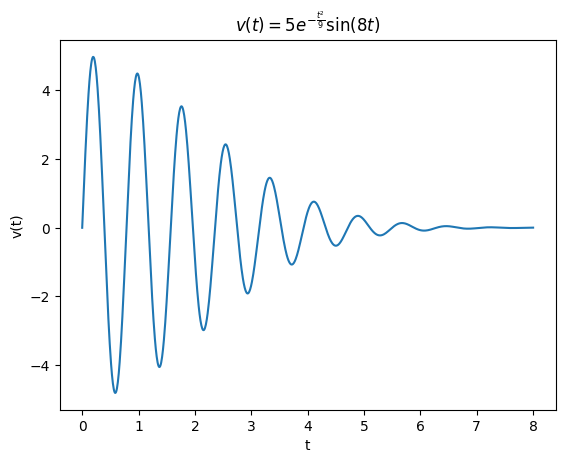

In [5]:
"""Problem 4"""

t = np.linspace(0,8,1000)
v = 5*exp(-t**2/9)*sin(8*t)

plt.plot(t,v)
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('$v(t) = 5e^{-\\frac{t^2}{9}}\sin(8t)$')

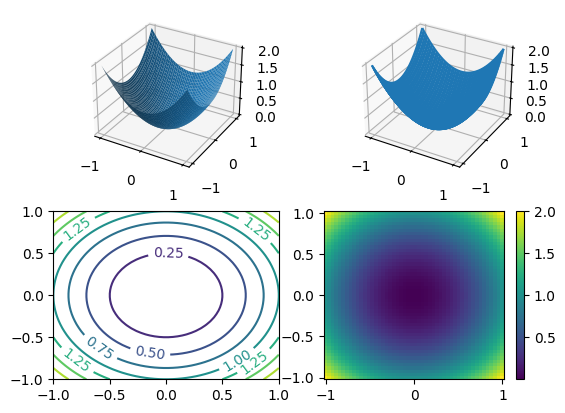

In [6]:
"""Problem 5"""

x = np.linspace(-1,1)
y = x.copy()
[x,y] = np.meshgrid(x,y)

f = x**2 + y**2

fig = plt.figure()
ax = fig.add_subplot(221,projection='3d')
ax.plot_surface(x,y,f)

ax = fig.add_subplot(222,projection='3d')
ax.plot_wireframe(x,y,f)

ax = fig.add_subplot(223)
CS = ax.contour(x,y,f)                  # label contours
ax.clabel(CS,inline=1,fontsize=10)

ax = fig.add_subplot(224)
CB = ax.pcolor(x,y,f)
fig.colorbar(CB,ax=ax)

## create a sphere
# check notes from previous years


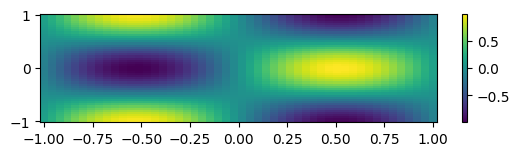

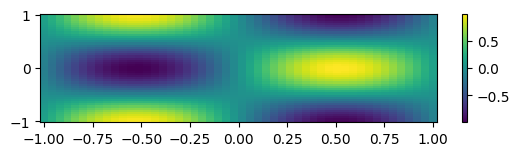

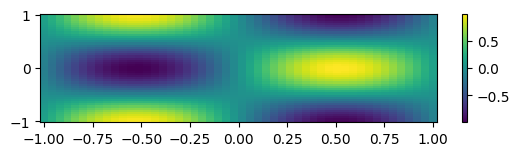

In [7]:
"""Problem 6"""

def f_def(x,y):
    return sin(3*x)*cos(3*y)

f_lambda = lambda x,y: sin(3*x)*cos(3*y)

fig = plt.figure()
ax = fig.add_subplot(311)
CB = ax.pcolor(x,y,f_def(x,y))
fig.colorbar(CB,ax=ax)

import f2

fig = plt.figure()
ax = fig.add_subplot(311)
CB = ax.pcolor(x,y,f2.f2(x,y))
fig.colorbar(CB,ax=ax)

fig = plt.figure()
ax = fig.add_subplot(313)
CB = ax.pcolor(x,y,f_lambda(x,y))
fig.colorbar(CB,ax=ax)

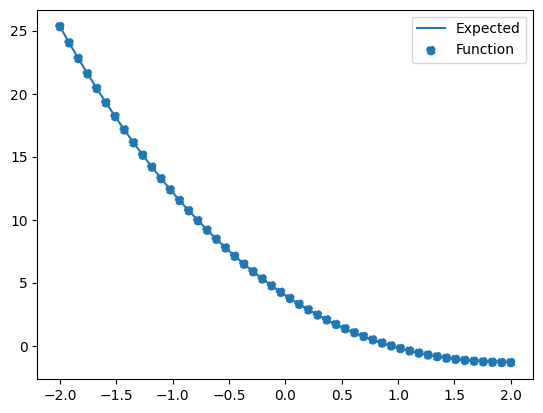

In [8]:
"""Problem 8"""

def laguerre(n,x,a):
    """
    Compute the laguerre polynomial of degree n.
     
    l = laguerre(n, x) returns the laguerre polynomial of degree n in x.
    a = alpha constant
    n = degree of polynomial
    """

# Check whether n is a non-negative integer

    if np.logical_or(round(n)- n != 0, n < 0):
        #return print('n must be a positive integer')
        raise ValueError('n must be a positive integer') 
    lp = np.zeros(n+1)
    lp_l = np.zeros(n+1)
    #lp_l = lp.copy() # This to copies as opposed to sharing  memory
    # Don't use lp_l = lp because it seems to make them equal for all time
    lp_u = np.zeros(n+1)
    # if either of the first 2 polynomials are required just state them
    if n==0:
        lp = np.ones(1)
    elif n==1:
        lp = [a+1,-1]   # [x^0,x^1]
    elif n>1:
        m = 2
        lp_l[0] = 1
        lp_u[0] = a+1
        lp_u[1] = -1
        
        while m < n+1:
            lp = (( 2 + (a-1)/m)*lp_u[0:n+1] - 1/m*np.concatenate(([0],lp_u[0:n]))) - (1 + (a-1)/m)*lp_l # Remember with indice addressing this mean from 0 to less than n
                        
            # lp is still a n+1 sized vector, doing the operations of lp_u & lp_l by indicies
            # lp_u = [0 2 0 0], n = 3
            # [[0], lp_u[0:n]] same size as lp_l, removing the n+1 value.
            m = m + 1
            # Now reset the polynomials
            lp_l = lp_u.copy()
            lp_u = lp.copy()
    lp = np.flipud(lp)
 # Now evaluate full vector h(n,x)
    res = np.polyval(lp,x)
    return res

 # Or alternative res calcuation that does not speed things up but is essential for Numba later
 #   y = np.zeros_like(x)
    
 #   for i in range(len(lp)):
 #       y = y * x + lp[i]
        
    # return y

lim = 2

x = np.linspace(-lim,lim)
a = 1                
laguerre_true = 1/6*(-x**3 + 3*(a+3)*x**2 - 3*(a+2)*(a+3)*x + (a+1)*(a+2)*(a+3))
plt.figure()
plt.plot(x,laguerre_true, label = 'Expected')
plt.scatter(x,laguerre(3,x,a), ls = '--', label = 'Function')
plt.legend()

In [9]:
"""Problem 9"""

f = lambda x: abs(x)**(-1/2)

int = 2*sp.integrate.quad(f,0,1)[0]
print(int)
print(f'error = {abs(int - 4)}')

3.9999999999999982
error = 1.7763568394002505e-15


In [10]:
"""Problem 9b: 2D"""

f = lambda y,x: y*sin(x) + x*cos(y)

int = sp.integrate.dblquad(f,pi,2*pi,0,pi)
true = -pi**2
print(f'Integral: {int[0]}, Estimate error: {int[1]}')
print(f'Calculated error = {abs(int[0] - true)}')
print()

## variable limits
f = lambda y,x: 1
R = 1
xlim_u = R
xlim_l = -R
ylim_u = lambda x: sqrt(R**2 - x**2)
ylim_l = lambda x: -sqrt(R**2 - x**2)

int = sp.integrate.dblquad(f,xlim_l,xlim_u,ylim_l,ylim_u)
true = pi*R**2
print(f'Integral: {int[0]}, Estimate error: {int[1]}')
print(f'error = {abs(int[0] - true)}')
print()

## spherical integration
f = lambda phi, r, theta: 1
jacob = lambda phi, theta, r: r**2*sin(theta)
R = 1

r_u = R
r_l = 0
theta_u = pi
theta_l = 0
phi_u = 2*pi
phi_l = 0

int = sp.integrate.tplquad(jacob,r_l,r_u,theta_l,theta_u,phi_l,phi_u)
true = 4*pi/3
print(f'Integral: {int[0]}, Estimate error: {int[1]}')
print(f'error = {abs(int[0] - true)}')
print()


Integral: -9.869604401089358, Estimate error: 1.4359309630105241e-13
Calculated error = 0.0

Integral: 3.1415926535897967, Estimate error: 2.000470900043183e-09
error = 3.552713678800501e-15

Integral: 4.1887902047863905, Estimate error: 1.389095079694993e-13
error = 0.0



<class 'numpy.ndarray'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


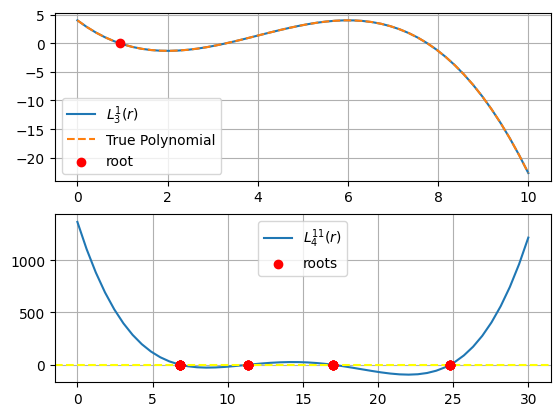

In [11]:
"""Practical Problem 12"""
import scipy.optimize as opt

def laguerre(alpha,n,x):
#LAGUERRE Compute the LAGUERRE polynomial of degree n.
# h = laguerre(n, alpha, x) returns the laguerre polynomial
# of degree n, alpha in x.


#Check whether n is a non-negative integer
    if np.logical_or(round(n)- n!= 0, n < 0):
        #return print('n must be a positive integer')
        raise ValueError('n must be a positive integer') 
    
# Set up a vector of the same size as final vecto
    lp = np.zeros(n+1)
    
# if either of the first 2 laguerre polynomials just state them
    if n==0:
        lp = np.ones(1)
    elif n== 1:
        lp = [alpha+1.0,-1.0]
    elif n>1:
        lp_l = np.zeros(n+1)
        lp_u = np.zeros(n+1)
        lp_l[0] = 1.0
        lp_u[0] = alpha + 1
        lp_u[1] = -1
        
        for ii in range(2, n+1): 
            lp = (2+(alpha-1)/ii)*lp_u-1/ii*np.concatenate(([0],lp_u[0:n])) -(1+(alpha-1)/ii)*lp_l;
            # Remember with indice addressing this mean from 0 to less than n
            # Now reset the polynomials
            lp_l = lp_u.copy()
            lp_u = lp.copy()
    lp = np.flipud(lp)
 # Now evaluate full vector h(n,x)
    res = np.polyval(lp,x)
    return res

def legendre(m,l,x):
#Compute the assosciated legendre polynomial of degree m and l.
# legendre(m,l,x)  returns the laguerre polynomial
# of degree m, l where m and l are positive integers and x is a 1d numpy array.
    
# Check whether l is a non-negative integer
    if np.logical_or(round(l) - l!= 0, l < 0):
        #return print('l must be a positive integer')
        raise ValueError('l must be a positive integer') 
    
# Check whether m is an integer and abs(m)<=l
   
    if np.logical_or(round(m)- m!= 0, abs(m) > l):
        return print('m must be a integer with abs(m)<= l')
        
        #raise ValueError('m must be a positive integer')   
        
        
# Calculate the leg(m=0,l=0),leg(m=0,l=1) and leg(m=0,l=2) as p1,p2 and p3 
    p1 = np.array(1)
    p2 = np.array(x)
    L = 2
    M = 0
    p3 = ((2*L-1)*x*p2-(L+M-1)*p1)/(L-M)
    

    
# Calculate the values of the polymomials  from leg(m=0,l=0),leg(m=0,l=1) and leg(m=0,l=2)to
# iterate to get leg(m=m,l=m), leg(m=m,l=m+1) and leg(m=m,l=m+2)
    
    if abs(m)>0:
        for ii in range(1, abs(m)+1):
            M = ii
            L = ii
            p1 = ((L-M+1)*x*p2-(L+M-1)*p1)/np.sqrt(1-x**2)
            L = L + 1
            p2 = ((L-M+1)*x*p3-(L+M-1)*p2)/np.sqrt(1-x**2)
            L = L + 1
            p3 =((2*L-1)*x*p2 - (L+M-1)*p1)/(L-M)
            
#If leg(m=m,l=m)or leg(m=m,l=m+1) or leg(m=m,l=m+2)are needed just use the values calculate
# previously
# If l> m+2 then simply interate using leg(m=m,l=m+1) and leg(m=m,l=m+2) as starting
# points to get leg(m=m,l=l)  
   
    if abs(m)==l:
        p = p1.copy()
    elif abs(m) == l-1:
        p = p2.copy()
    elif abs(m) == l-2:
        p = p3.copy()
 
    else:
        pa1 = p2.copy()
        pa2 = p3.copy()
    
        for ii in range(abs(m)+3, l+1):
            L = ii
            M = m
            patemp =((2*L-1)*x*pa2 - (L+M-1)*pa1)/(L-M);
            pa1 = pa2.copy()
            pa2 = patemp.copy()

    
        p = patemp.copy()
        
# If abs(m) < 0 simply use leg(m=abs(m),l=l) to calcuatle leg(m = -abs(m),l=l)
    
    if m < 0:
        n = abs(m);
        p = ((-1)**n)*(factorial(l-n)/factorial(l+n))*p;


    
    return p

# check if Laguerre is correct

n = 4
l = 0
a0 = 5.29e-11
a = 2*l+1

r = np.linspace(0,10)
rho = lambda r: 2*r/(n*a0)
L_radius = lambda r: laguerre(1,3,r)
L_true = lambda r: -r**3/6 + (a + 3)*r**2/2 - (a+2)*(a+3)*r/2 + (a+1)*(a+2)*(a+3)/6
# L_true = lambda r: sp.genlaguerre(3,a)(r)

root = opt.newton(L_radius, x0=0)

# root = 0
# while root < 1e-18:
#     root = opt.newton(L_radius, x0=root)
#     print(root)

plt.subplot(211)
plt.plot(r,L_radius(r), label = '$L_3^1(r)$')
plt.plot(r,L_true(r), label = 'True Polynomial', linestyle = '--')
plt.scatter(root, L_radius(root), color='red', zorder=5, label = 'root')
plt.grid()
plt.legend()

## for any combination of l,n

n = 10
l = 5
lim = 30
r0 = np.arange(0,lim)    # place integer guesses for n-l-1th degree Lagrangean
r = np.linspace(0,lim)
L_radius = lambda r: laguerre(2*l+1,n-l-1,r)

print(type(r0))
print(r0)

roots = opt.fsolve(L_radius, r0)
# print(roots)

plt.subplot(212)
plt.plot(r,L_radius(r), label = f'$L^{{{2*l+1}}}_{n-l-1}(r)$')
plt.axhline(y = 0, color = 'yellow', linestyle = '--')
plt.scatter(roots, L_radius(roots), color='red', zorder=5, label = 'roots')
plt.grid()
plt.legend()

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.8315585584027548
             x: [ 3.838e+00]
           nit: 17
          nfev: 34
 final_simplex: (array([[ 3.838e+00],
                       [ 3.837e+00]]), array([ 8.316e-01,  8.316e-01]))


Text(0, 0.5, 'f(x)')

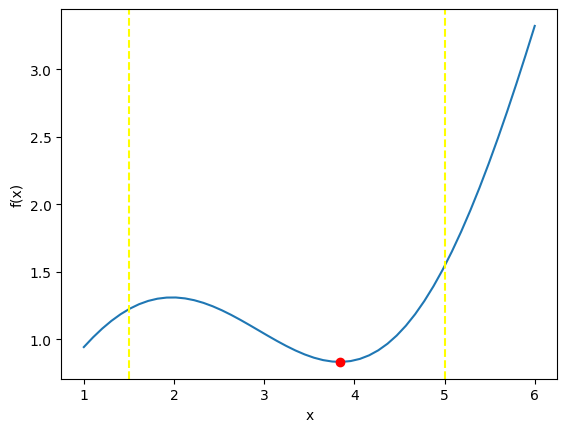

In [12]:
x = np.linspace(1,6)
f = lambda x: sin(x) + 0.1*x**2
f_min = opt.minimize(f, 2, method = 'Nelder-Mead', bounds = [(1.5,5)])
print(f_min)

plt.plot(x,f(x))
plt.scatter(f_min.x, f_min.fun, color='red', label="Root", zorder=5)
plt.axvline(x = 1.5, color = 'yellow', linestyle = '--')
plt.axvline(x = 5, color = 'yellow', linestyle = '--')
plt.xlabel('x')
plt.ylabel('f(x)')